In [1]:
from qiskit.circuit import QuantumRegister, ClassicalRegister, QuantumCircuit
from Rui.FCP import FCP

from src.artihmetic.counter import count
from src.artihmetic.increment import control_decrement
from src.logic.oracles import oracle_a, oracle_b
from src.util.util import run_qc


Result from the remote Quantum Inspire backend:

State	Counts
000	1024

Result from the local Qiskit simulator backend:

{'000': 1024}


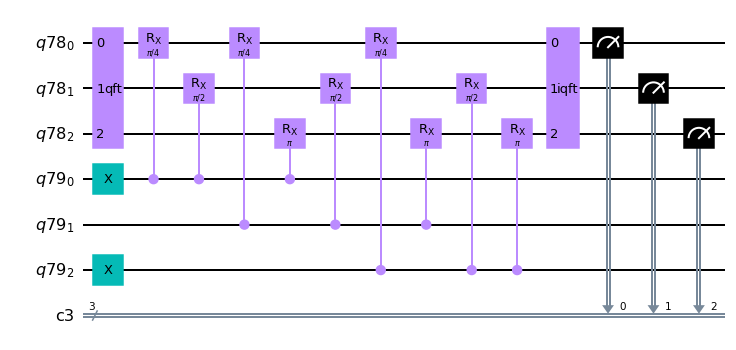

In [6]:
q = QuantumRegister(3)
a = QuantumRegister(3)
c = ClassicalRegister(3)
qc = QuantumCircuit(q, a, c)

qc.x(a[0])
qc.x(a[2])

qc = count(qc, q, a)

# Should equal 010
qc.measure(q[:], c[:])

run_qc(qc)
qc.draw(output="mpl")


Result from the local Qiskit simulator backend:

{'101': 1024}


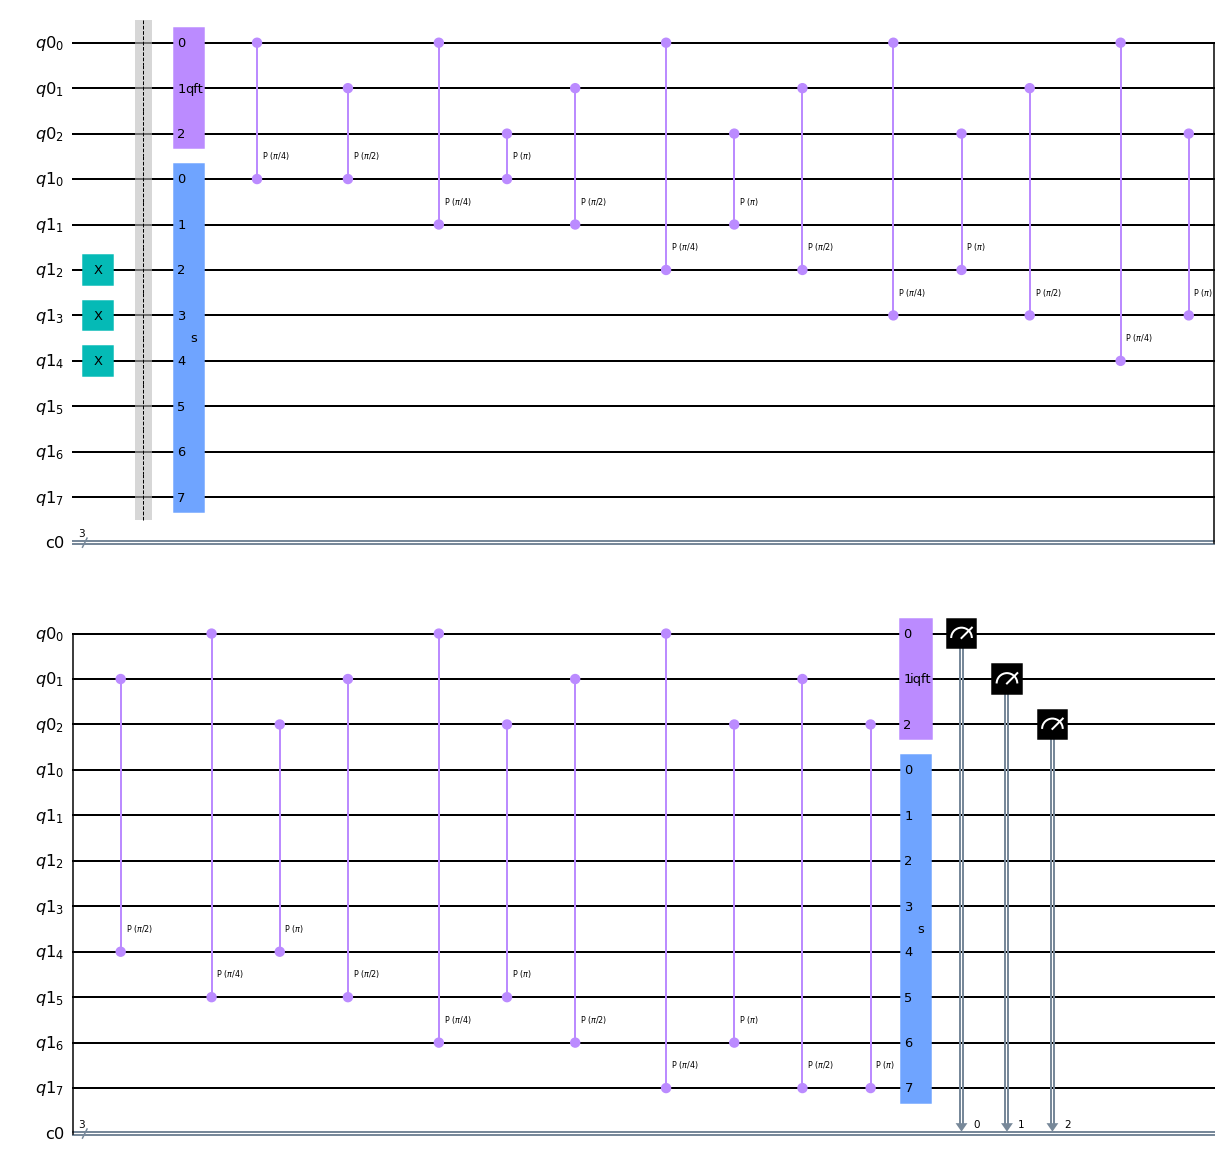

In [2]:
q = QuantumRegister(3)
a = QuantumRegister(8)
c = ClassicalRegister(3)
qc = QuantumCircuit(q, a, c)


qc.x(a[2:5])
qc.barrier()

qc = oracle_a(qc, a, q, [0, 1, 2, 3])

# Should equal 110
qc.measure(q[:], c[:])

run_qc(qc, with_QI=False)
qc.draw(output="mpl")

In [ ]:
q = QuantumRegister(4)
a = QuantumRegister(3)
c = ClassicalRegister(3)
qc = QuantumCircuit(q, a, c)

qc.barrier()

qc = control_decrement(qc, a, q)

# Should equal 110
qc.measure(a[:], c[:])

run_qc(qc)
qc.draw(output="mpl")

In [ ]:
FCP(4, 2).draw(output="mpl")

0 3 [1, 0, 0, -1.0]
1 1 [1, -1.0, 1.0, -1.0]

Result from the local Qiskit simulator backend:

{'001': 1024}


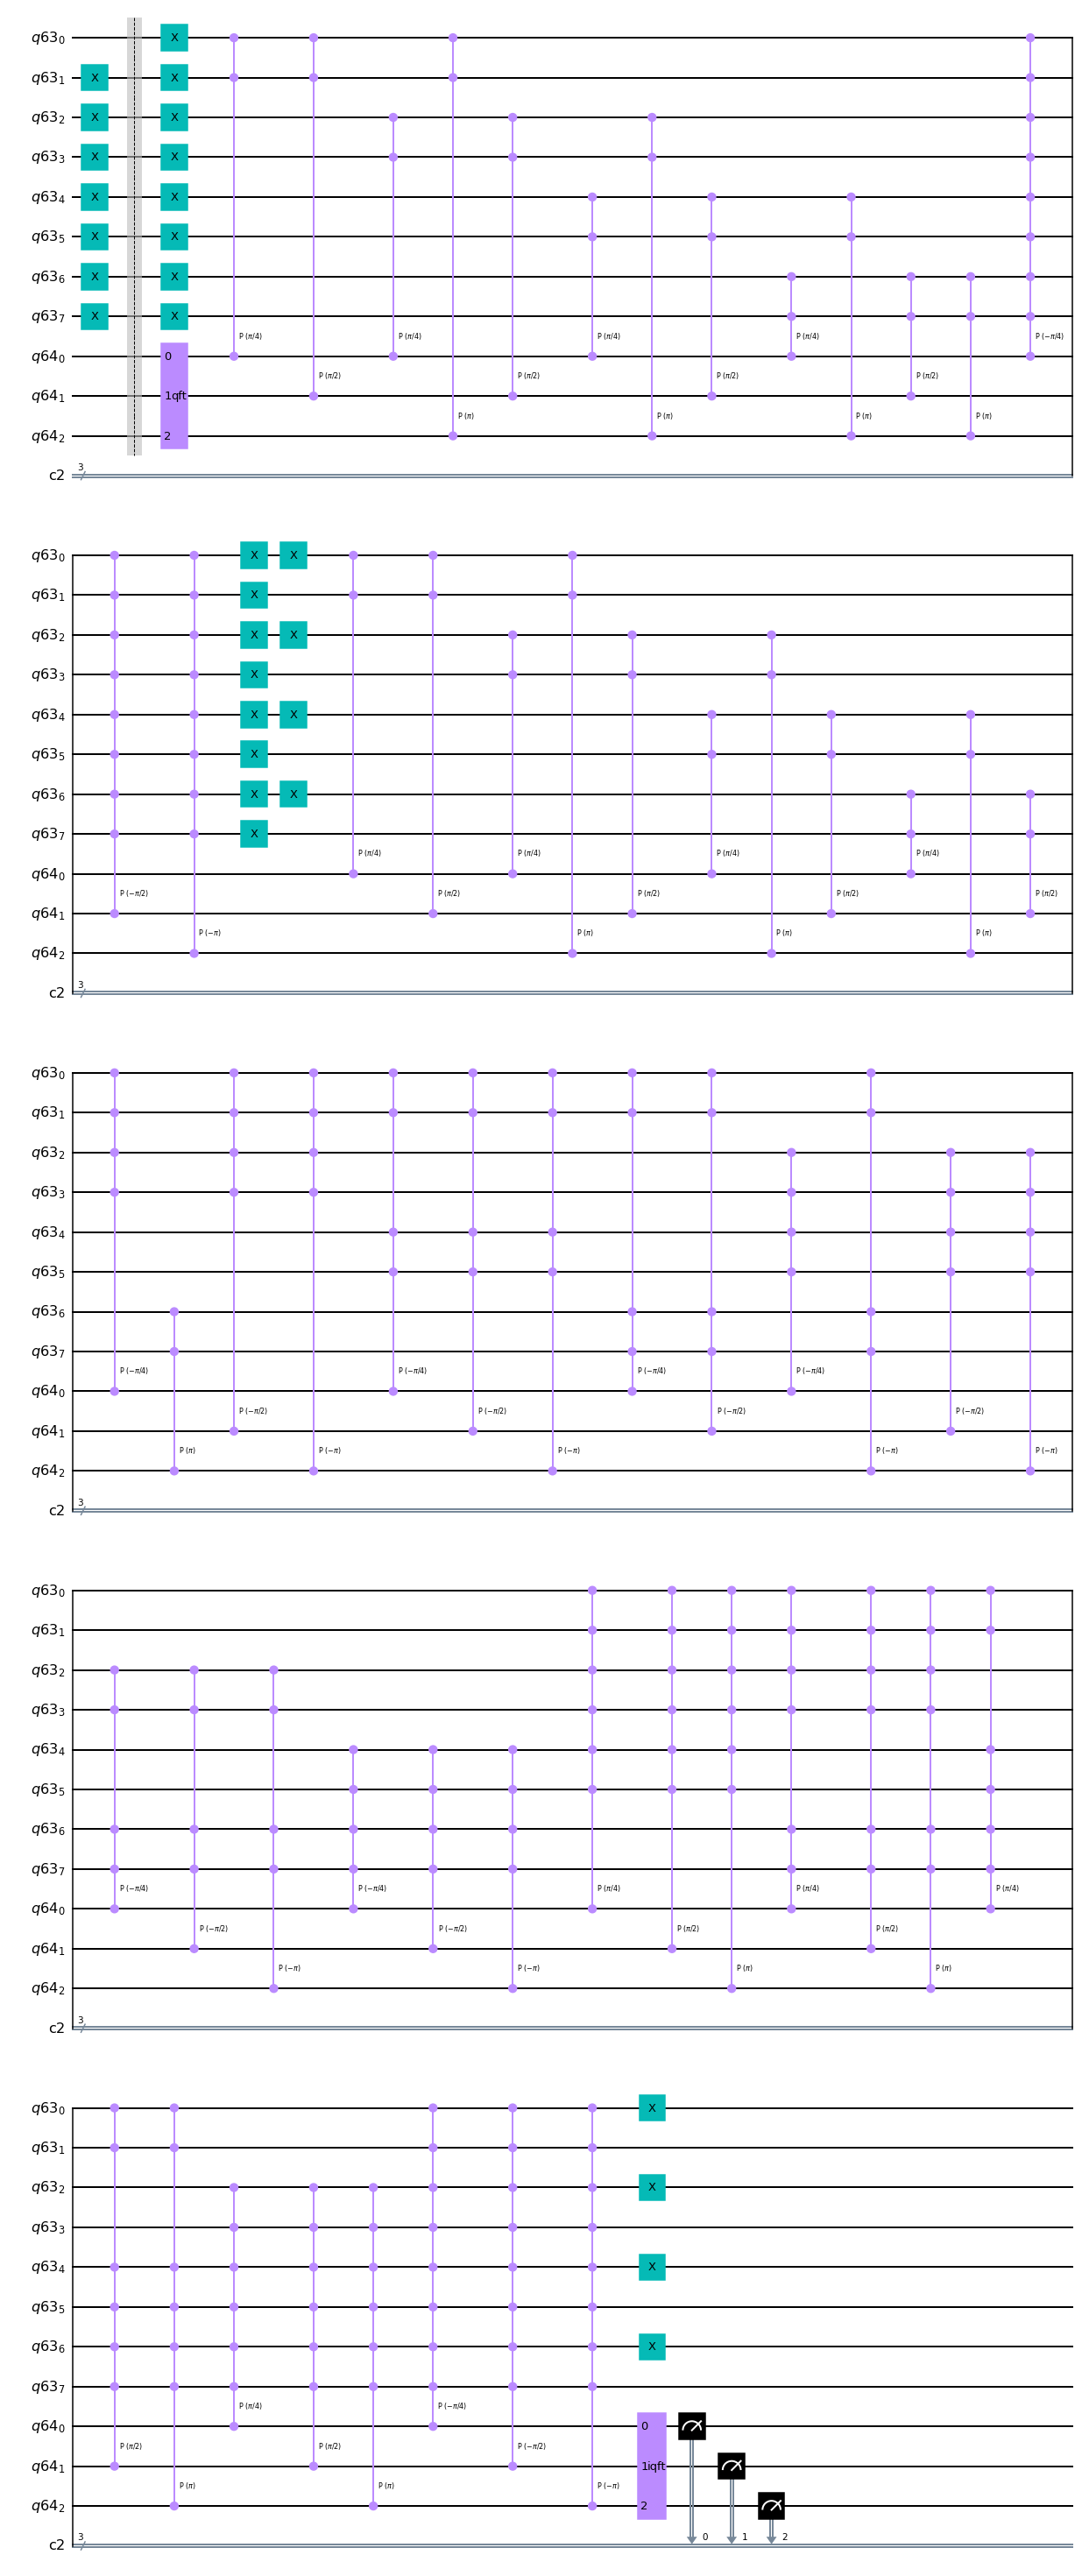

In [4]:
q = QuantumRegister(8)
b = QuantumRegister(3)
c = ClassicalRegister(3)
qc = QuantumCircuit(q, b, c)

# 10, 11, 11, 11

qc.x(q[1])
qc.x(q[2:8])
qc.barrier()

# [0, 0, 0, 1] = 11, 11, 11, 10

qc = oracle_b(qc, q, b, [0, 0, 0, 1])

# Should equal 110
qc.measure(b[:], c[:])

run_qc(qc, with_QI=False)
qc.draw(output="mpl")